AI in Medical Sciences and Psychology by Tshepo Chris Nokeri, Apress. 2022

# Chapter 3: A Case for COVID-19: Identifying Hidden States and Simulation Results

This chapter instigates a set of series analysis methods to uniquely discern patterns in the US COVID-19 confirmed cases. To begin with, the Gaussian Hidden Markov Model inherits the series data, models it and identify the hidden states, including the means and covariance in those states. Subsequently, the Monte Carlo simulation method replicates US COVID-19 confirmed cases across multiple trials, thus providing us with a rich comprehending of the pattern.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import warnings
warnings.filterwarnings("ignore")
covid_us_df = pd.read_csv(r"C:\Users\i5 lenov\Documents\revisions\time_series_covid19_deaths_US.csv", index_col=[0], parse_dates=[0])["cases_confirmed"]
covid_us_df = pd.DataFrame(covid_us_df)
covid_us_df

,cases_confirmed
date,
2020-03-06,NaN
2020-03-07,NaN
2020-03-08,NaN
2020-03-09,NaN
2020-03-10,NaN
...,...
2021-09-23,31331.0
2021-09-23,567011.0
2021-09-23,710145.0


# Descriptive Analysis

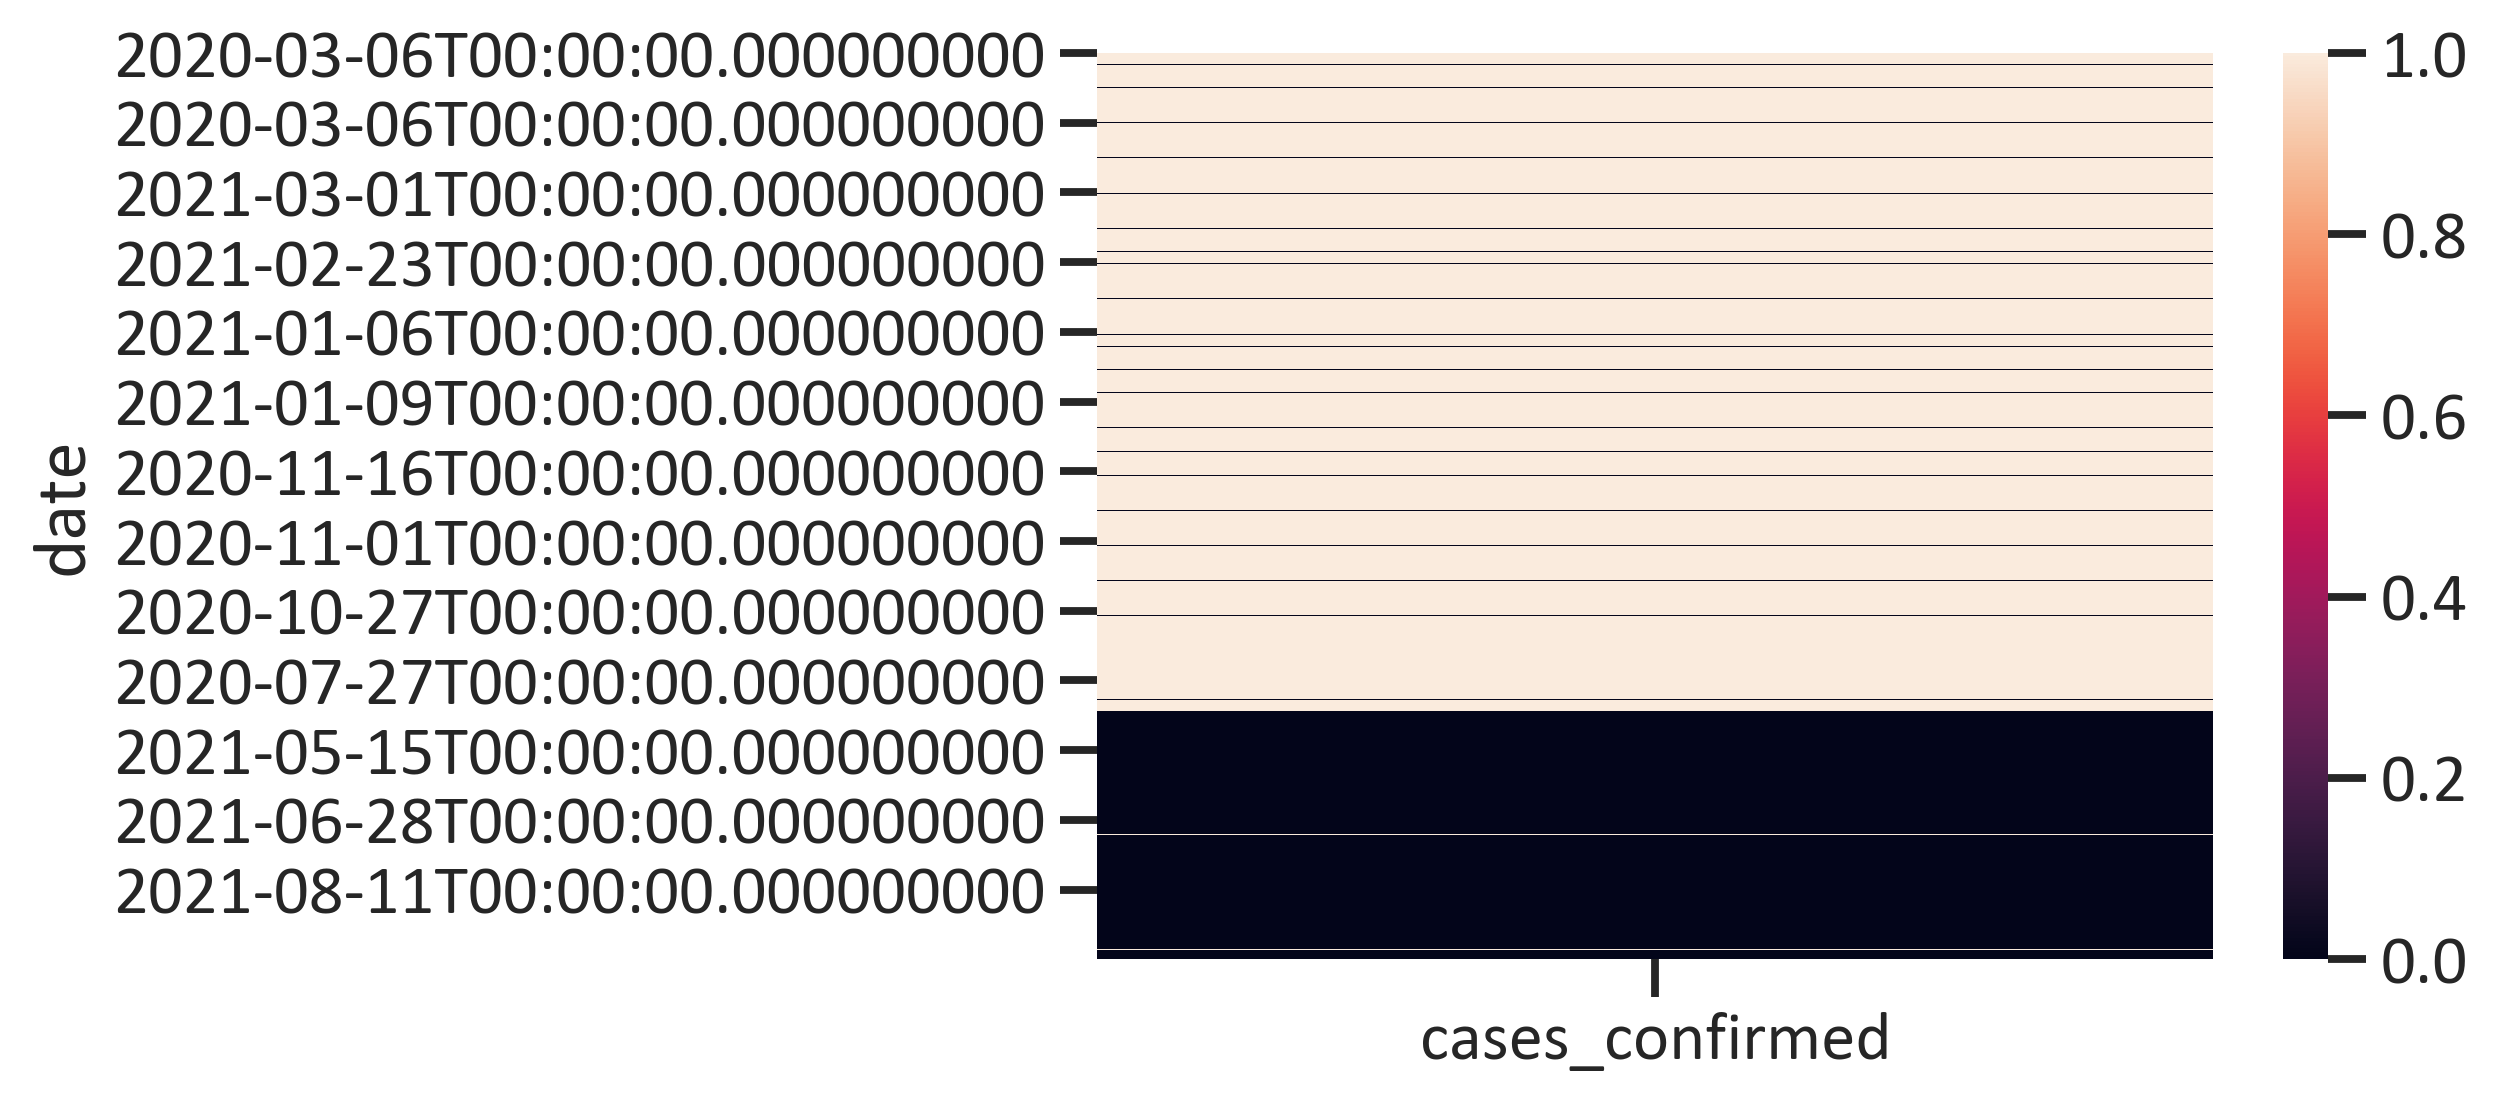

In [2]:
sns.heatmap(covid_us_df.isnull())
plt.show()

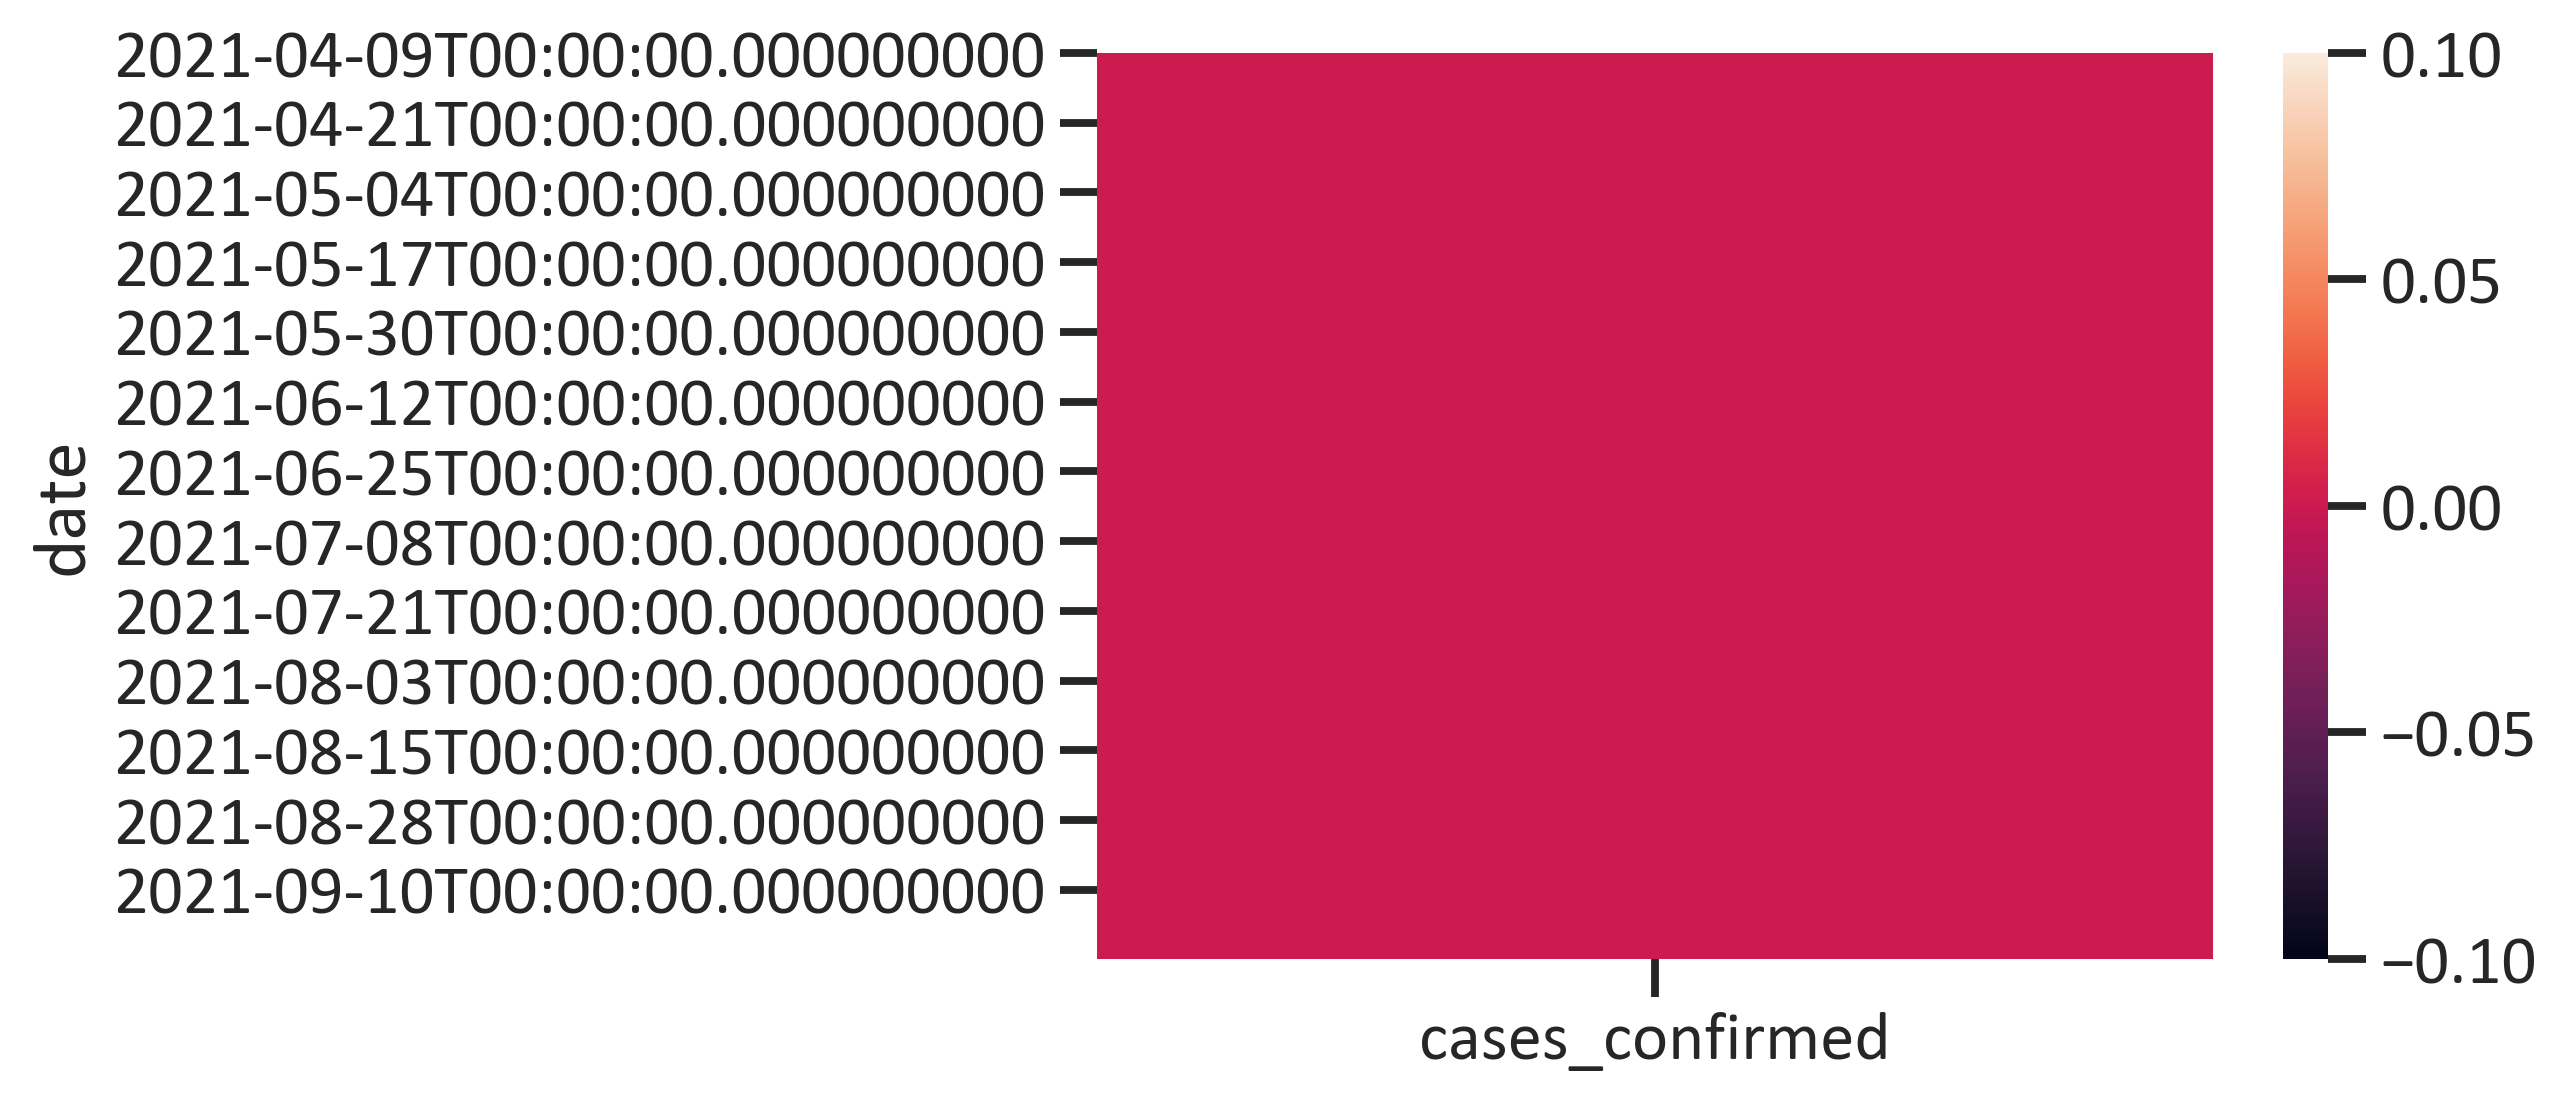

In [3]:
covid_us_df = covid_us_df.dropna()
sns.heatmap(covid_us_df.isnull())
plt.show()

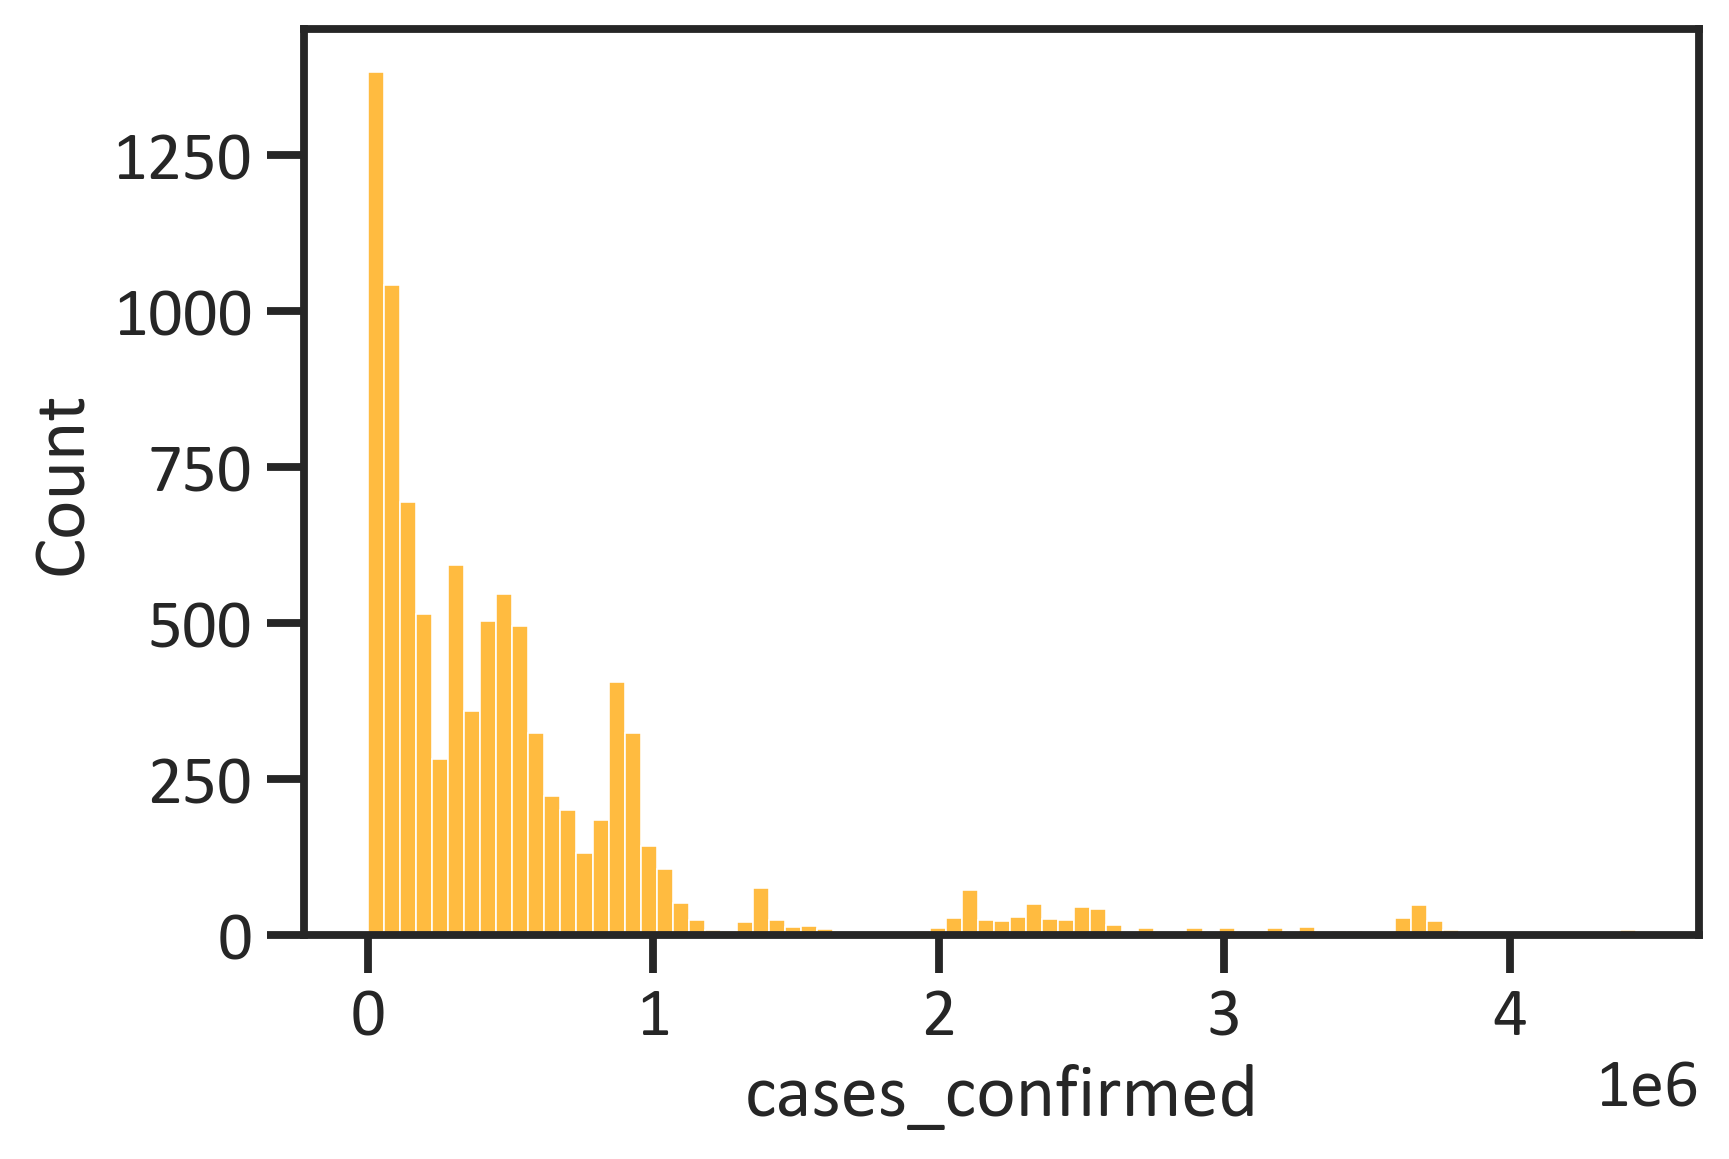

In [4]:
sns.histplot(data=covid_us_df, x = covid_us_df.cases_confirmed, color = "orange")
plt.show()

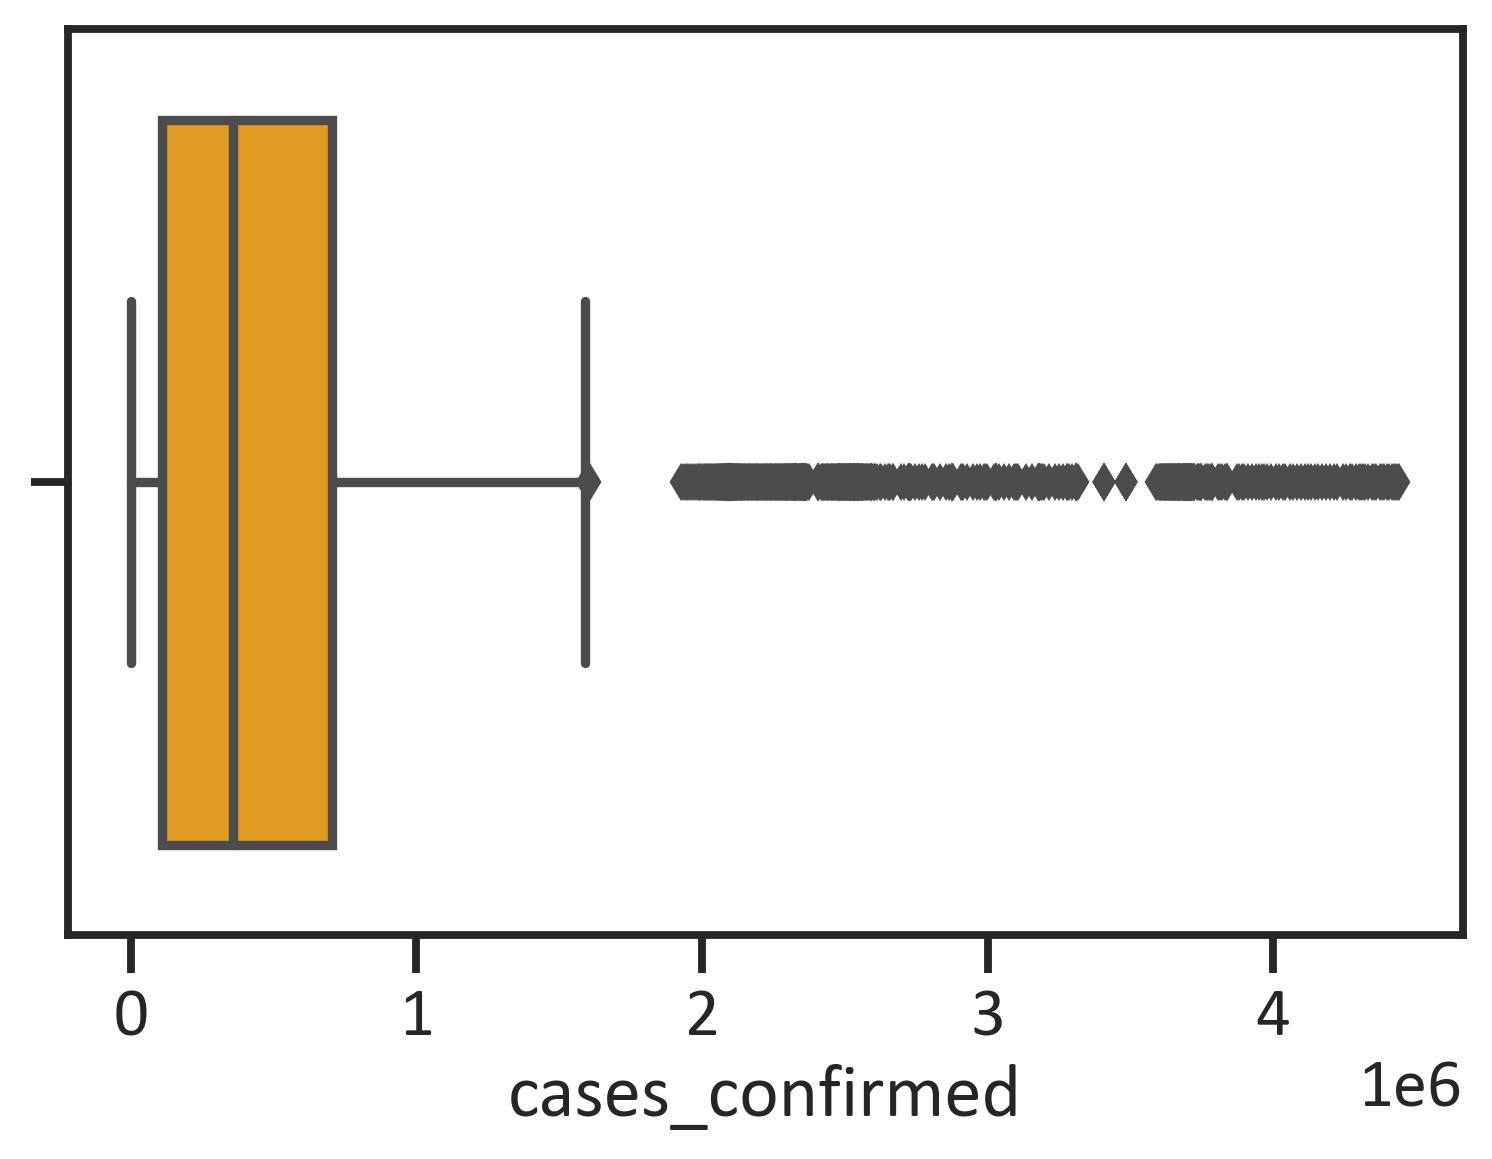

In [5]:
sns.boxplot(data = covid_us_df, x = covid_us_df.cases_confirmed, color = "orange")
plt.show()

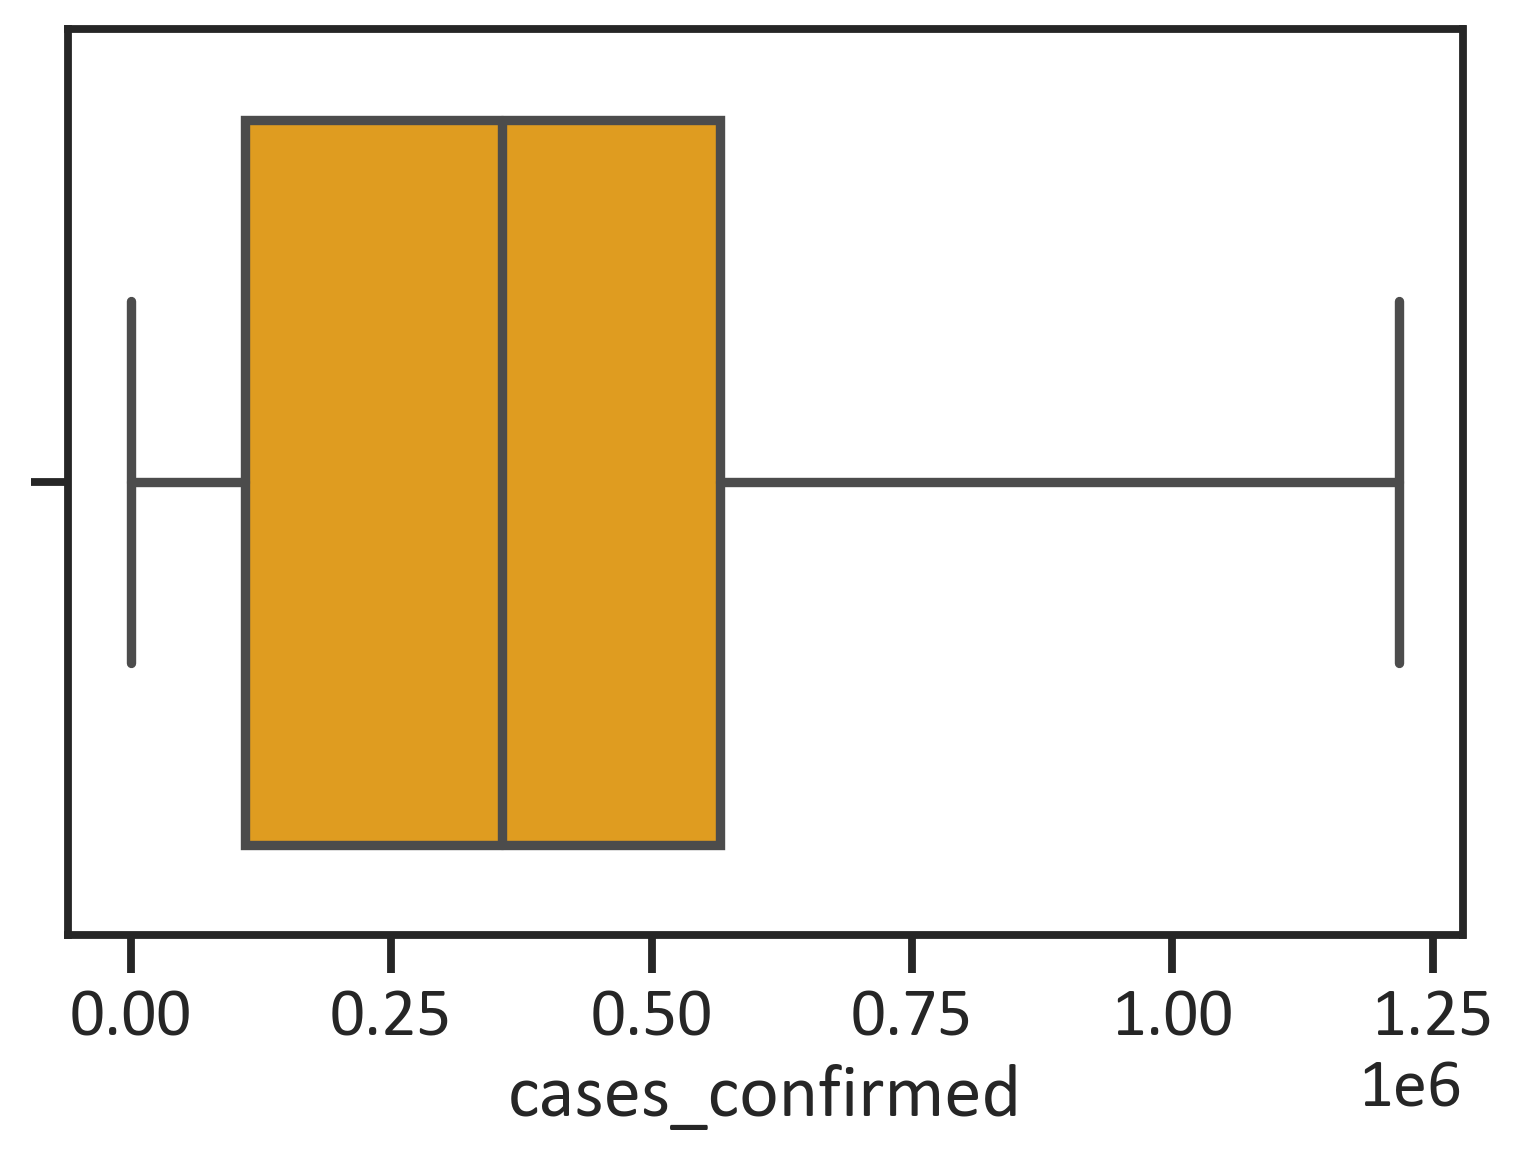

In [6]:
import numpy as np
covid_us_df.cases_confirmed = np.where((covid_us_df.cases_confirmed > 1.25e+6),covid_us_df.cases_confirmed .mean(),covid_us_df.cases_confirmed)
sns.boxplot(data = covid_us_df, x = covid_us_df.cases_confirmed, color = "orange")
plt.show()

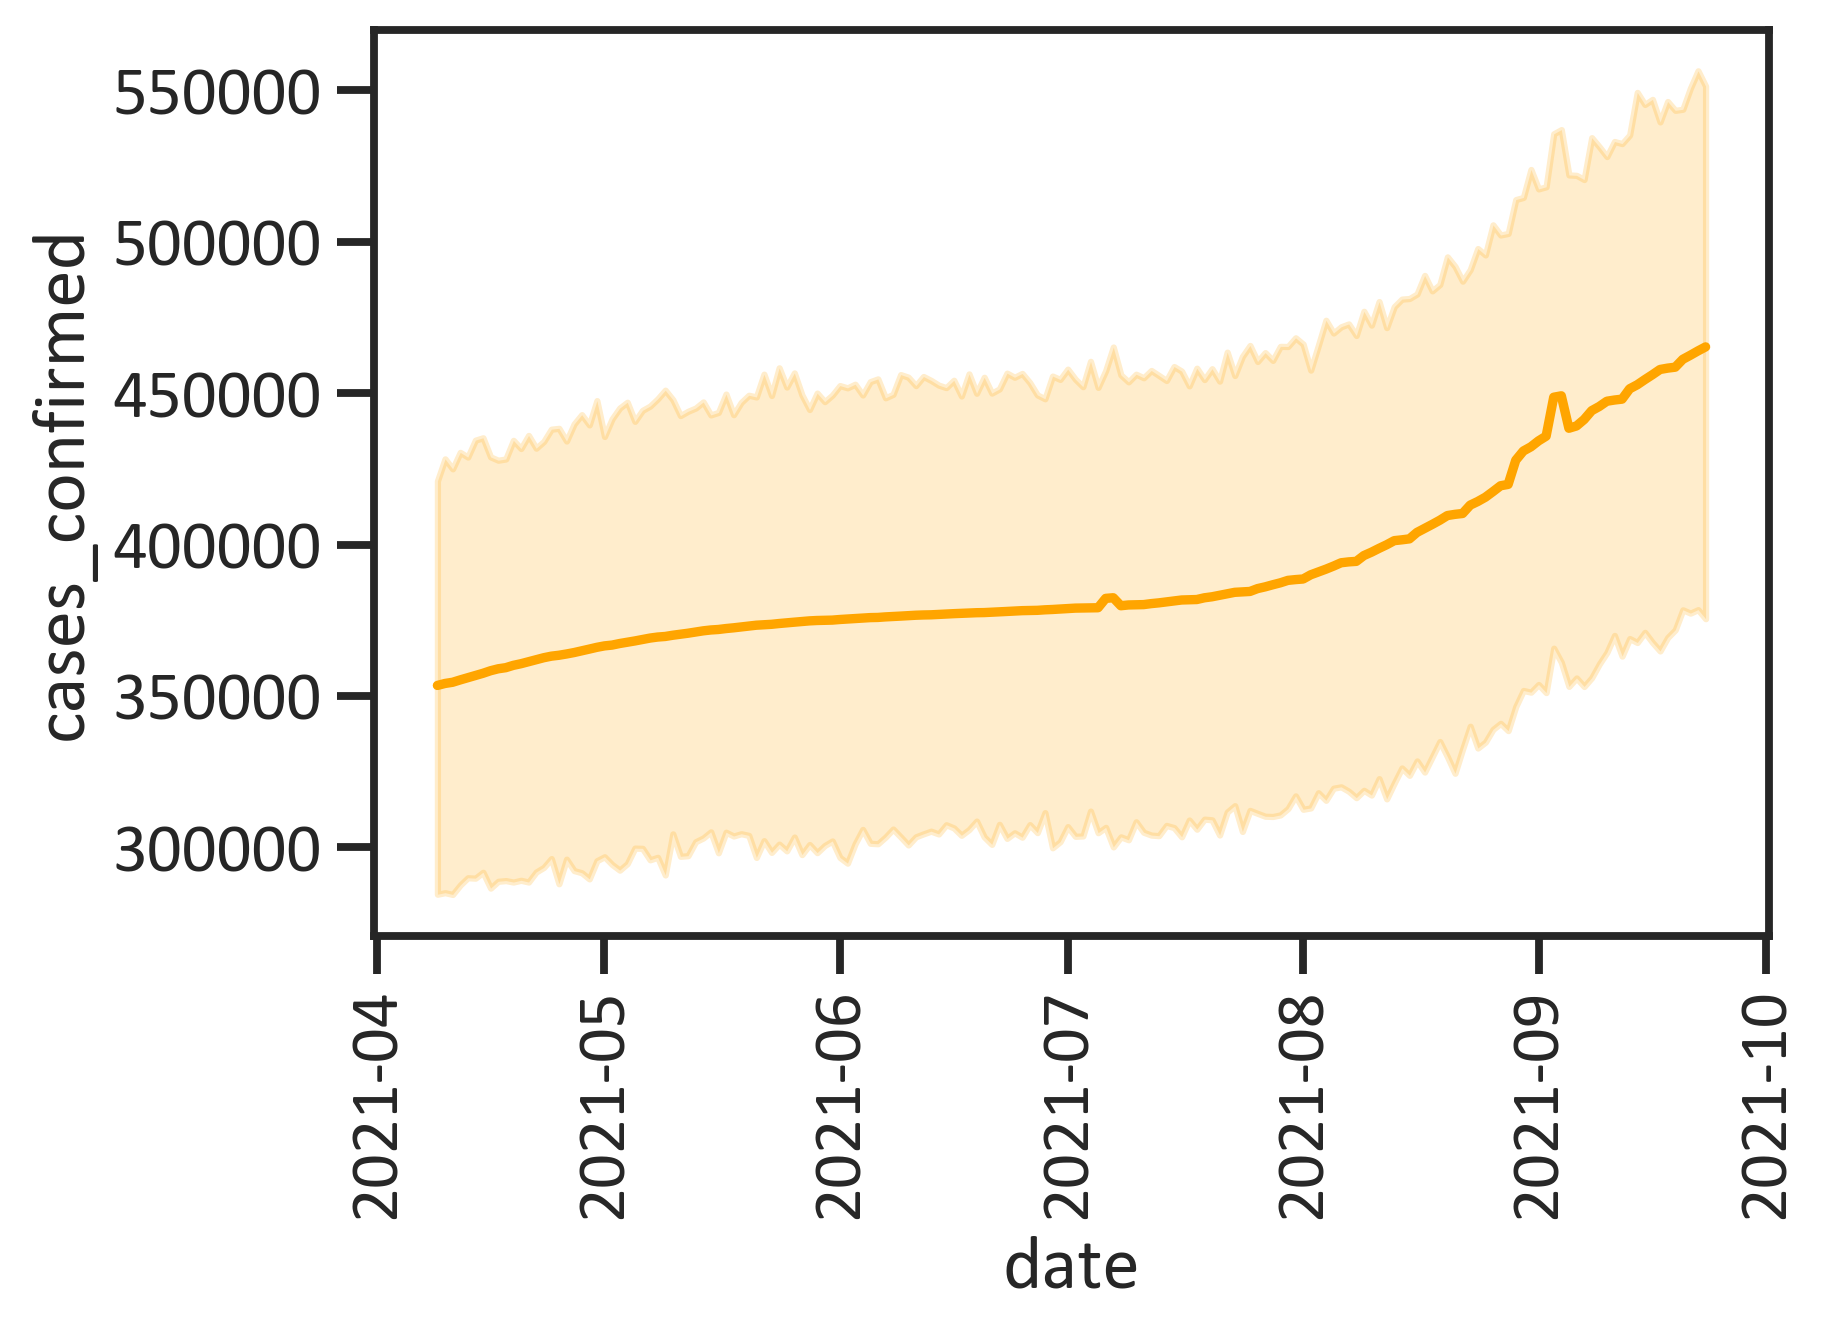

In [7]:
sns.lineplot(data=covid_us_df, x = covid_us_df.index, y = covid_us_df.cases_confirmed, color = "orange")
plt.xticks (rotation = 90) 
plt.show()

In [8]:
covid_us_df.describe()

,cases_confirmed
count,9.380000e+03
mean,3.900083e+05
std,2.952401e+05
min,0.000000e+00
25%,1.094280e+05
50%,3.560650e+05
75%,5.653697e+05
max,1.217892e+06


# Carrying out the Gaussian Hidden Markov Model

In [9]:
from hmmlearn.hmm import GaussianHMM
hmm_data = np.column_stack([covid_us_df])
gaussian_hmm_model = GaussianHMM(n_components=2, tol=0.0001, n_iter=10)
gaussian_hmm_model.fit(hmm_data)

GaussianHMM(n_components=2, tol=0.0001)

## Identifying Hidden States with the Gaussian Hidden Markov Model

In [10]:
hidden_states = pd.DataFrame(gaussian_hmm_model.predict(hmm_data), columns = ["hidden_states"])
hidden_states.index = covid_us_df.index
hidden_states.head()

,hidden_states
date,
2021-04-09,0
2021-04-10,0
2021-04-11,0
2021-04-12,0
2021-04-13,0


In [11]:
hidden_states.describe()

,hidden_states
count,9380.000000
mean,0.570469
std,0.495036
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


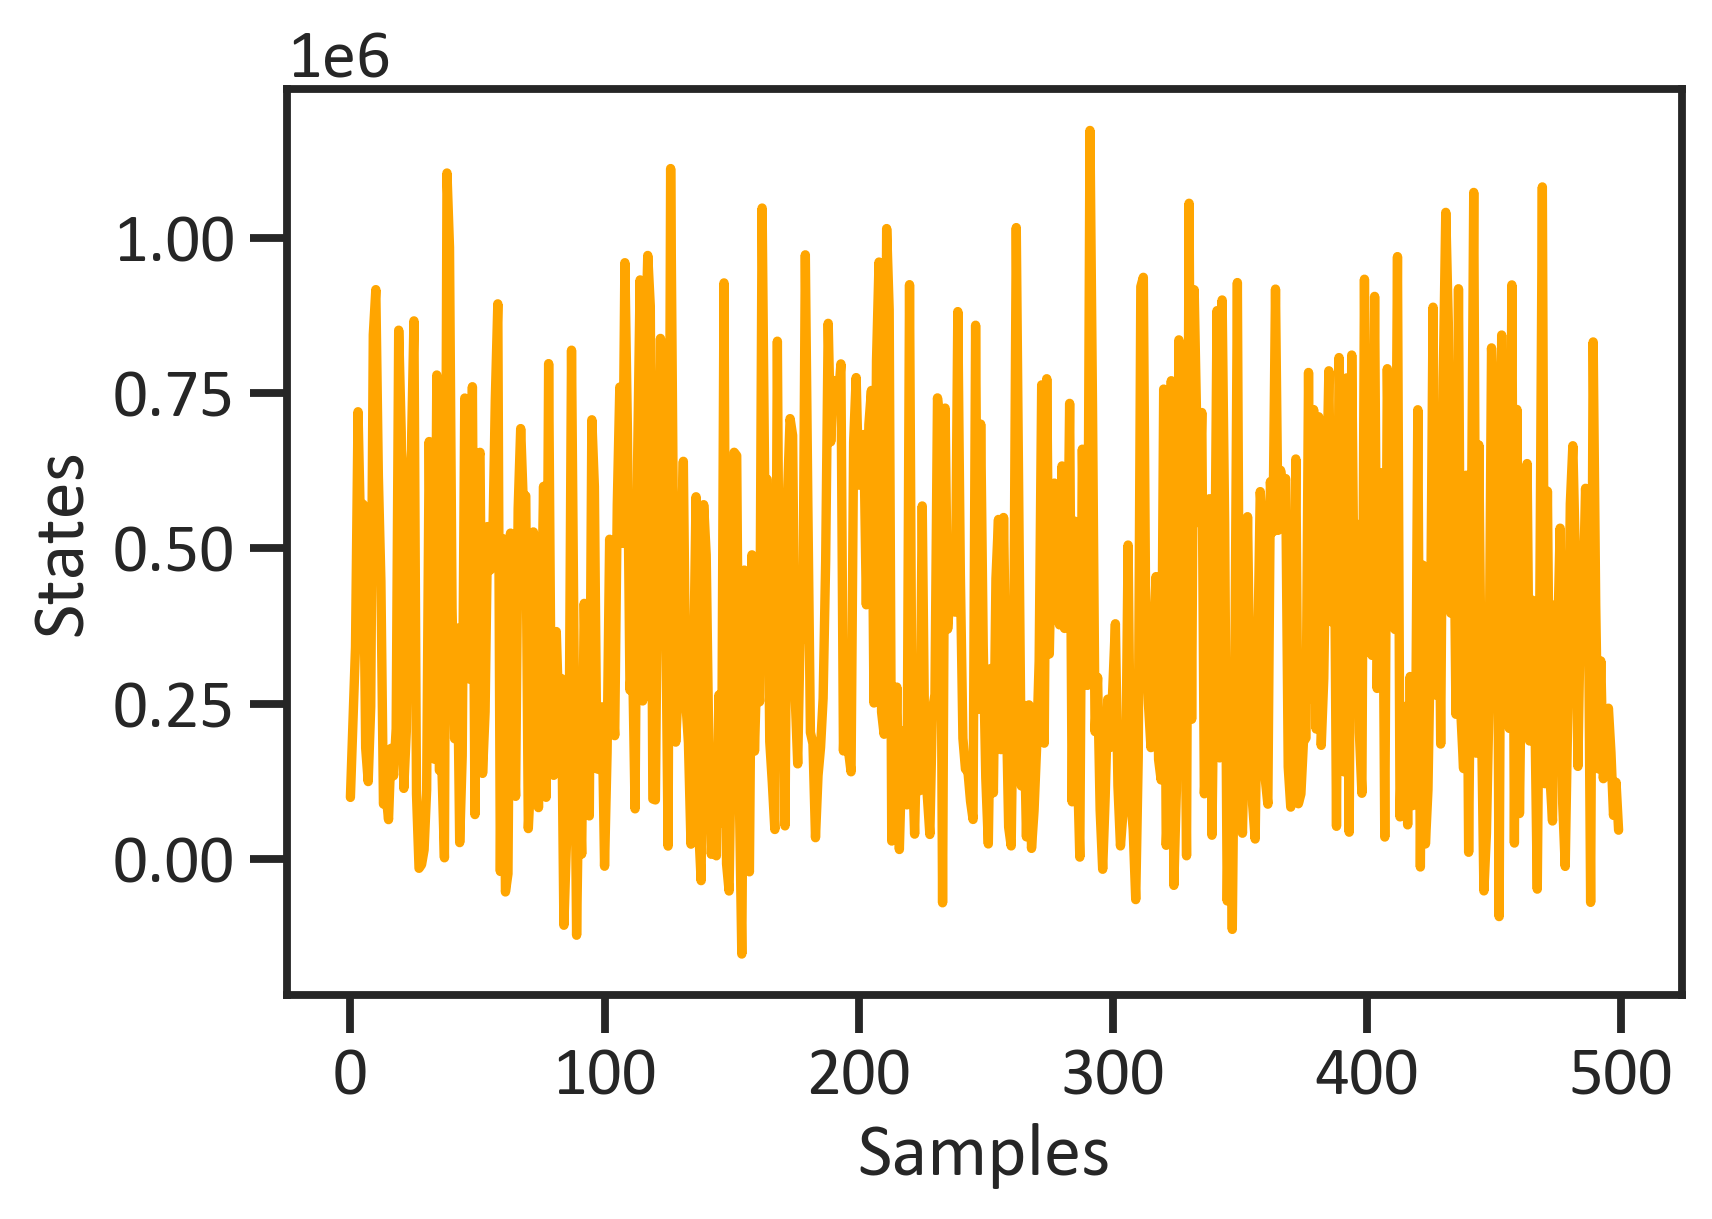

In [12]:
n_sample = 500
sample, _ = gaussian_hmm_model.sample(n_sample)
plt.plot(np.arange(n_sample), sample[:,0],color = "orange")
plt.xlabel("Samples")
plt.ylabel("States")
plt.show()

In [13]:
for i in range(gaussian_hmm_model.n_components):
    print("{0} order hidden state".format(i))
    print("mean = ", gaussian_hmm_model.means_[i])
    print("var = ", np.diag(gaussian_hmm_model.covars_[i]))
    print()

0 order hidden state
mean =  [121067.87933475]
var =  [9.70749219e+09]

1 order hidden state
mean =  [591252.94214326]
var =  [5.04899999e+10]



# Simulating Confirmed US COVID-19 Cases with the Monte Carlo Simulation Method

In [14]:
import pandas_montecarlo
monte_carlo_model = covid_us_df.cases_confirmed.montecarlo(sims=5, bust=-0.1, goal=1)

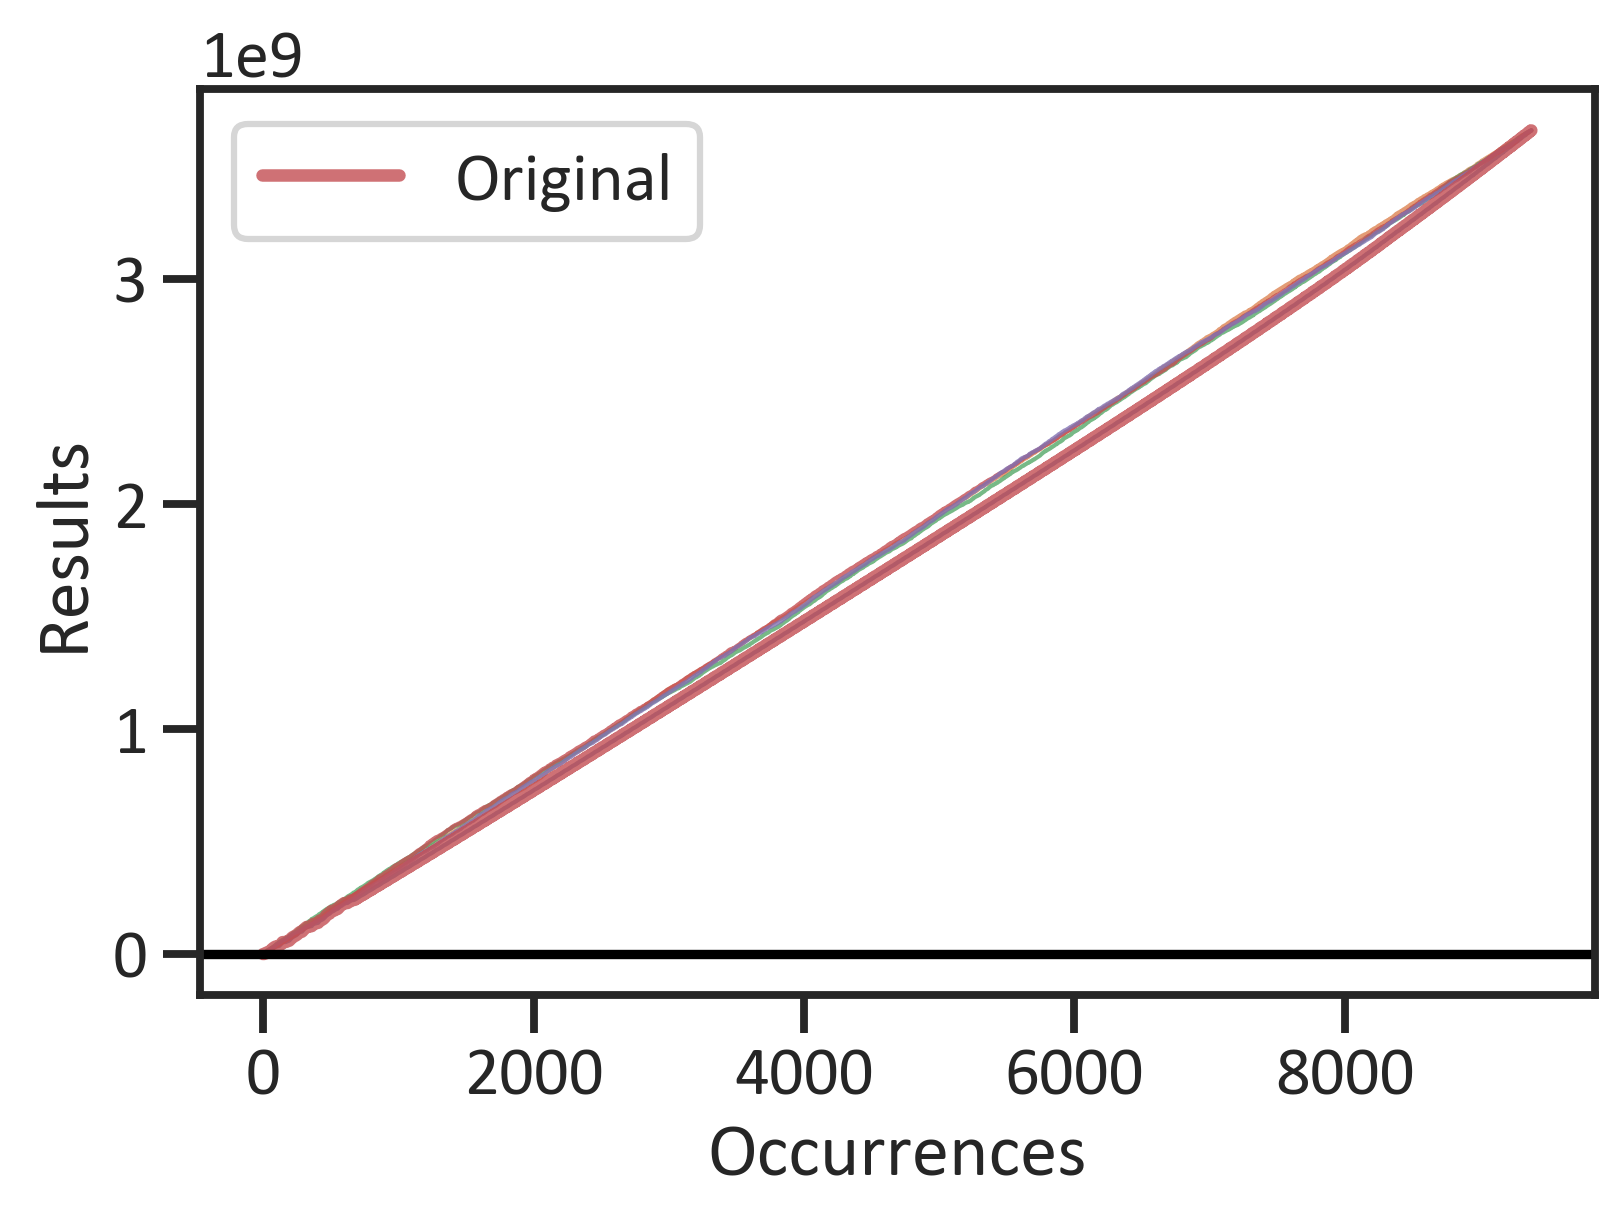

In [15]:
monte_carlo_model.plot(title="")

In [16]:
monte_carlo_model_output = pd.DataFrame(monte_carlo_model.data)
monte_carlo_model_output.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
original,9380.0,390008.25521,295240.11557,0.0,109428.0,356065.0,565369.72484,1217892.0
1,9380.0,390008.25521,295240.11557,0.0,109428.0,356065.0,565369.72484,1217892.0
2,9380.0,390008.25521,295240.11557,0.0,109428.0,356065.0,565369.72484,1217892.0
3,9380.0,390008.25521,295240.11557,0.0,109428.0,356065.0,565369.72484,1217892.0
4,9380.0,390008.25521,295240.11557,0.0,109428.0,356065.0,565369.72484,1217892.0


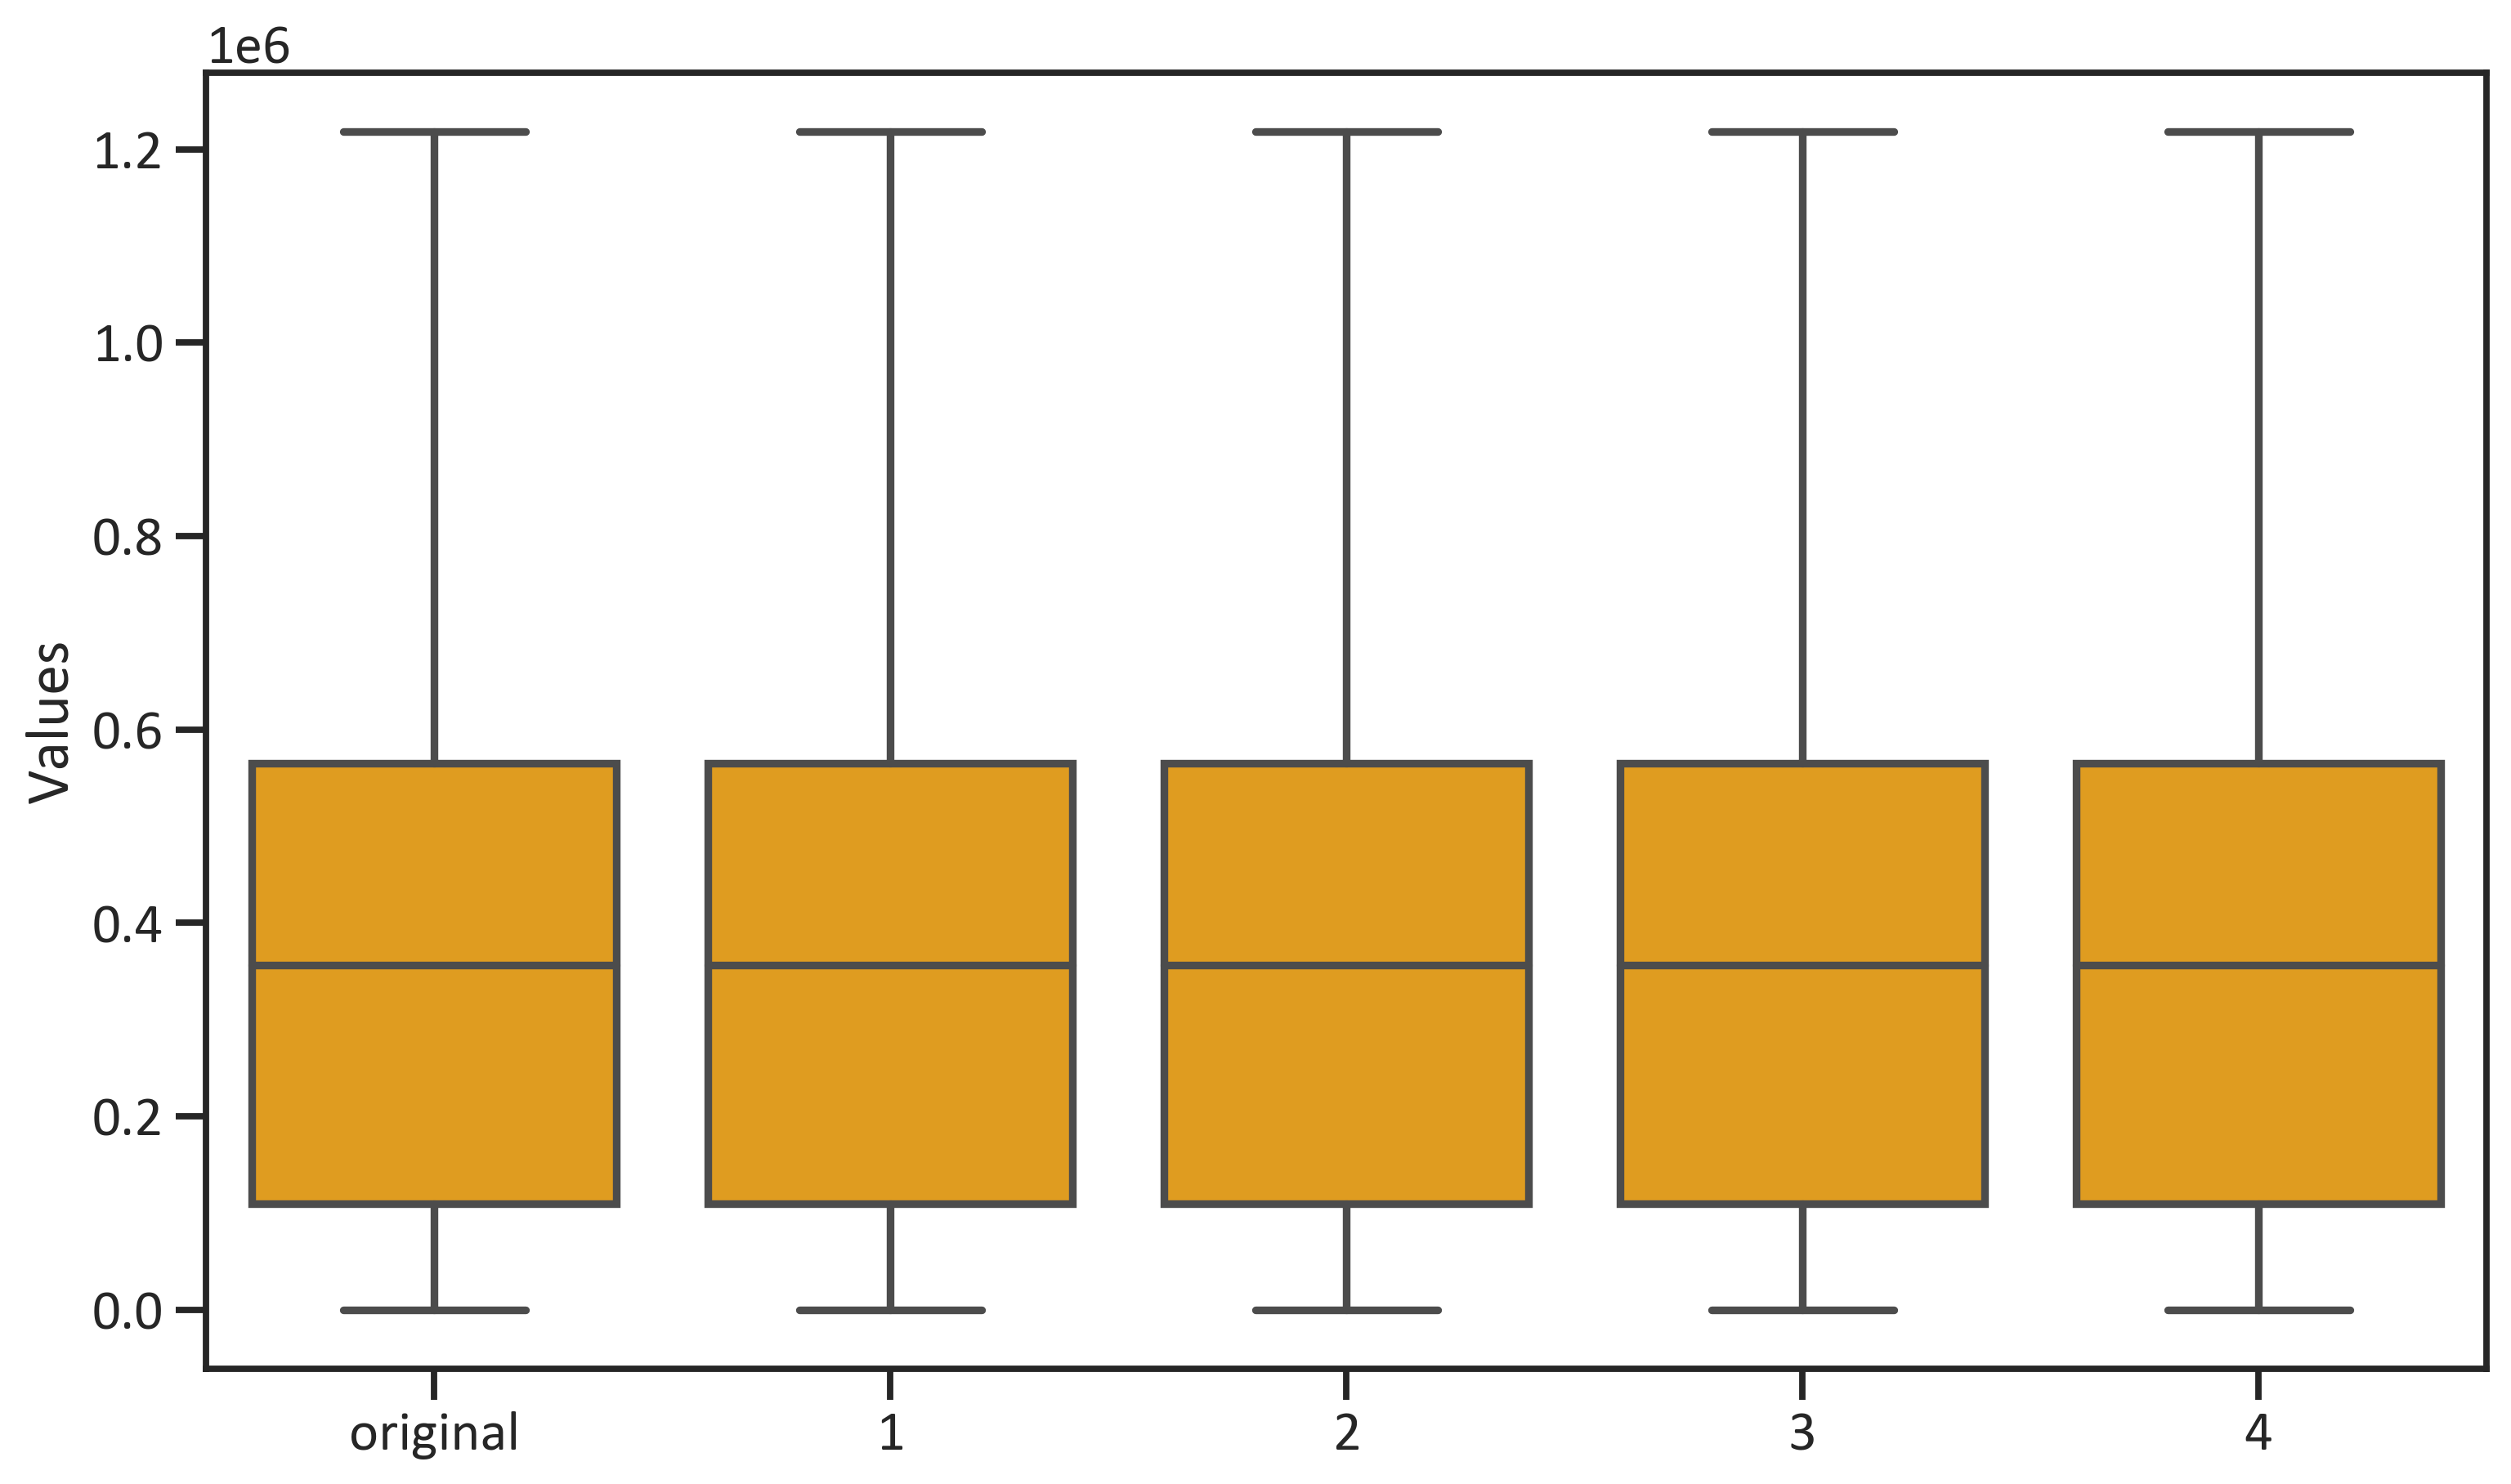

In [17]:
fig, ax = plt.subplots(figsize= (12, 7))
sns.boxplot(data = monte_carlo_model_output, color = "orange")
plt.ylabel("Values")
plt.show() 